<a href="https://colab.research.google.com/github/m01ali/Coding-Quiz_Solution/blob/main/Iris_Classification_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# For reproducible printing
np.set_printoptions(suppress=True)

## Load and inspect data

In [3]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

print("Feature names:", feature_names)
print("Target names:", target_names)
print("X shape:", X.shape)
print("y shape:", y.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
X shape: (150, 4)
y shape: (150,)


In [4]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Train-val-test split

- We first split off the test set: 20% of the data.
- Remaining 80% will be split into train (70%) and validation (10%).

In [5]:
X_temp, X_test, y_temp, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

- From the remaining 80%, we want 70% train and 10% validation overall.
- So within X_temp, *validation fraction = 0.1 / 0.8 = 0.125*

In [6]:
X_train, X_val, y_train, y_val = train_test_split( X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)

In [7]:
print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 105
Validation size: 15
Test size: 30


## Visualizing Data

In [8]:
# Set style for cleaner plots
sns.set(style="whitegrid")

<Figure size 1000x800 with 0 Axes>

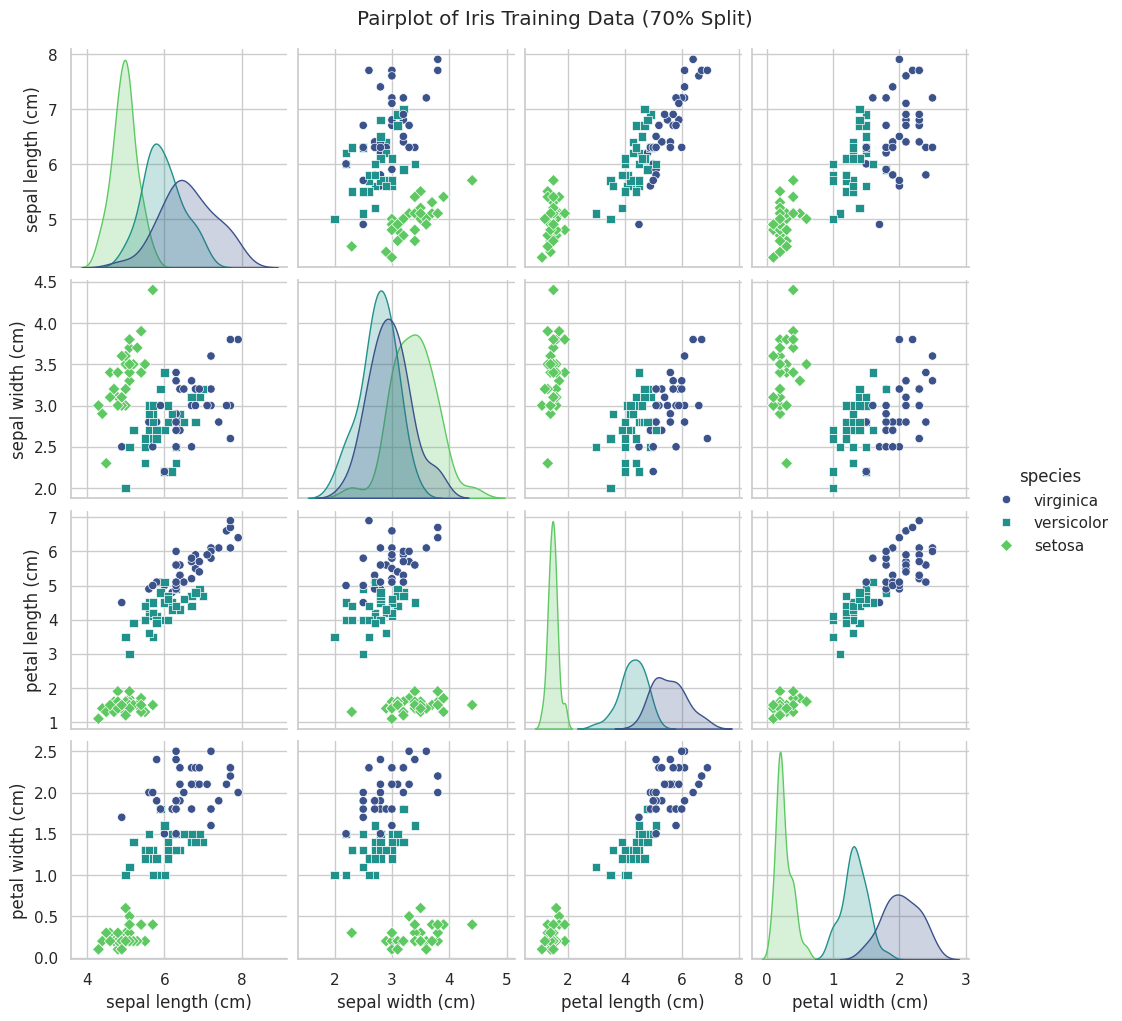

In [9]:
train_df = pd.DataFrame(X_train, columns=feature_names)
train_df['species'] = [target_names[i] for i in y_train]

plt.figure(figsize=(10, 8))
sns.pairplot(train_df, hue='species', palette='viridis', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Training Data (70% Split)", y=1.02)
plt.show()

## Define and train linear regression model

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Coefficients shape:", model.coef_.shape)
print("Intercept:", model.intercept_)

Coefficients shape: (4,)
Intercept: 0.1776479255660639


## Making Predictions

In [13]:
# Helper for converting regression outputs to class labels
def predict_classes_from_regression(model, X, n_classes=3):
    """
    Predict class labels from a regression model that outputs
    continuous values approximating class indices (0, 1, 2, ...).

    Strategy:
      1. Predict continuous values.
      2. Round to nearest integer.
      3. Clip to valid range [0, n_classes - 1].
    """
    y_continuous = model.predict(X)
    y_rounded = np.rint(y_continuous)
    y_clipped = np.clip(y_rounded, 0, n_classes - 1)
    return y_clipped.astype(int)

In [14]:
# Get continuous regression predictions (raw output)
y_test_pred_continuous = model.predict(X_test)
y_test_pred_continuous

array([-0.02379514,  1.59603325,  0.89666202,  0.89580195, -0.03849305,
        1.38479266, -0.14088339, -0.05984592,  1.75483165,  1.37547408,
        1.76889739,  1.89837484,  2.0030426 ,  1.27868593, -0.06472747,
       -0.07623733, -0.23106986,  1.01253183,  1.29554849,  1.58538346,
       -0.11961043,  2.076616  ,  1.16811554,  1.48732473,  1.9882319 ,
        1.49810891,  1.19057796, -0.04633981,  1.67635007, -0.10000433])

In [15]:
#Convert to class labels (0, 1, 2) using our helper function
y_test_pred_class = predict_classes_from_regression(model, X_test)
y_test_pred_class

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 1, 1, 0, 2, 0])

In [16]:
# Comparing Raw Regression -> Rounded Class -> True Class
print(f"{'Raw Reg Output':<20} | {'Pred Class':<12} | {'True Class':<12}")
print("-" * 50)
for i in range(10): # Show first 10 examples
    print(f"{y_test_pred_continuous[i]:<20.4f} | {y_test_pred_class[i]:<12} | {y_test[i]:<12}")

Raw Reg Output       | Pred Class   | True Class  
--------------------------------------------------
-0.0238              | 0            | 0           
1.5960               | 2            | 2           
0.8967               | 1            | 1           
0.8958               | 1            | 1           
-0.0385              | 0            | 0           
1.3848               | 1            | 1           
-0.1409              | 0            | 0           
-0.0598              | 0            | 0           
1.7548               | 2            | 2           
1.3755               | 1            | 1           


## Testing And Evaluation

In [17]:
def evaluate_split(name, model, X_split, y_split, n_classes=3):
    y_pred = predict_classes_from_regression(model, X_split, n_classes=n_classes)
    acc = accuracy_score(y_split, y_pred)
    print(f"=== {name} set ===")
    print("Accuracy:", acc)
    print("Confusion matrix:\n", confusion_matrix(y_split, y_pred))
    print("\nClassification report:")
    print(classification_report(y_split, y_pred, target_names=target_names))
    print("-" * 60)


# Evaluate on train and validation splits
evaluate_split("Train", model, X_train, y_train, n_classes=len(target_names))
evaluate_split("Validation", model, X_val, y_val, n_classes=len(target_names))

=== Train set ===
Accuracy: 0.9619047619047619
Confusion matrix:
 [[35  0  0]
 [ 0 33  2]
 [ 0  2 33]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.94      0.94      0.94        35
   virginica       0.94      0.94      0.94        35

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

------------------------------------------------------------
=== Validation set ===
Accuracy: 1.0
Confusion matrix:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        

In [18]:
evaluate_split("Test", model, X_test, y_test, n_classes=len(target_names))

=== Test set ===
Accuracy: 0.9666666666666667
Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

------------------------------------------------------------


### Confusion Matrix

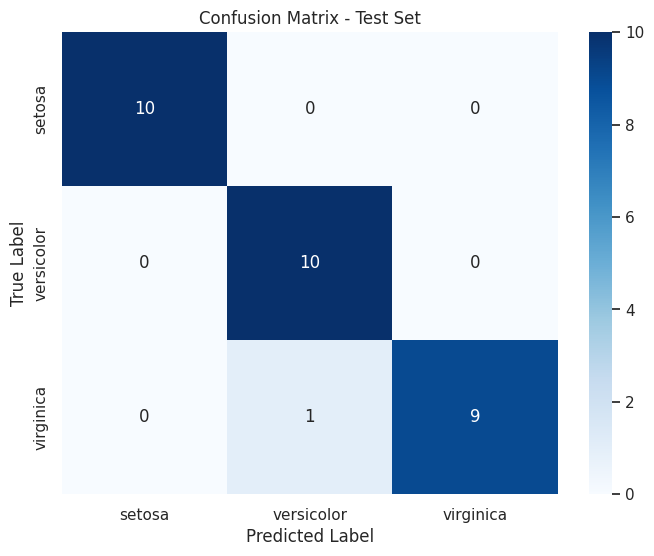

In [19]:
cm = confusion_matrix(y_test, y_test_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

## Visualize Evaluation - Regression vs. Classification
- This plot helps understand how Linear Regression is performing on discrete classification tasks.

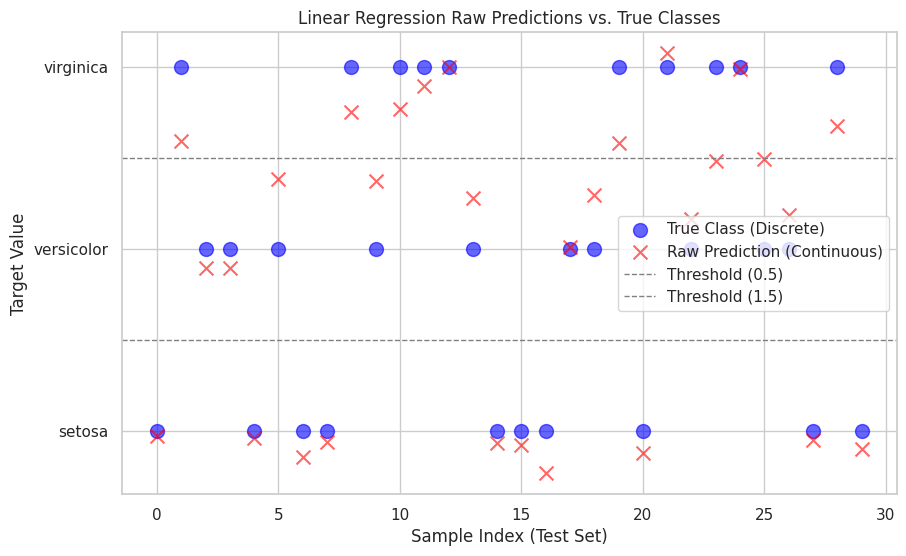

In [20]:
plt.figure(figsize=(10, 6))

# Scatter plot of True Class vs. Continuous Predicted Value
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Class (Discrete)', alpha=0.6, marker='o', s=100)
plt.scatter(range(len(y_test)), y_test_pred_continuous, color='red', label='Raw Prediction (Continuous)', alpha=0.6, marker='x', s=100)

# Draw threshold lines to show where the rounding happens
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, label='Threshold (0.5)')
plt.axhline(y=1.5, color='gray', linestyle='--', linewidth=1, label='Threshold (1.5)')

plt.title('Linear Regression Raw Predictions vs. True Classes')
plt.xlabel('Sample Index (Test Set)')
plt.ylabel('Target Value')
plt.yticks([0, 1, 2], target_names)
plt.legend()
plt.show()



### Interpretation:
- Points above 1.5 become 'virginica' (2)
- Points between 0.5 and 1.5 become 'versicolor' (1)
- Points below 0.5 become 'setosa' (0)